In [1]:
import os
import pylab
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib import pyplot as plt
import pickle

from liquidity.util.utils import get_agg_features

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from liquidity.response_functions.fitting import compute_scaling_exponents, renormalise

In [4]:
# Load raw sample data  from CSV
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'market_orders')


stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016-R1.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

## 1. Fitting Scaling Form

Approach I: fit scaling form on all data to find exponents and then use them for renormalisation.

In [5]:
MO_LAG_INTERVALS = [5, 10, 20, 50, 100]

In [6]:
# Find scaling parameters by fitting scaling form to entire dataset
popt_tsla, pcov_tsla, fit_func, data_norm = compute_scaling_exponents(tsla_raw_df, MO_LAG_INTERVALS)

## 2. Fitting Scaling Functions

Approach II: produce series of RN and QN by fitting scaling funtion for different N, then use powerlaw library to fit power law and determine scale factors; finally, fit known scaling form to find exponents and then use them for renormalisation.

In [32]:
LAGS = list(range(1, 1001))

In [ ]:
# # Aggregate orderflow
# tsla_imbalance = get_agg_features(tsla_raw_df, LAGS, remove_outliers=False)
# pickle.dump(tsla_imbalance, open('../../data/generated/tsla_aggregate_features_mo_df.pkl', 'wb'))

In [34]:
# msft_imbalance = get_agg_features(msft_raw_df, LAGS, remove_outliers=False)
# pickle.dump(msft_imbalance, open('../../data/generated/msft_aggregate_features_mo_df.pkl', 'wb'))

In [35]:
# amzn_imbalance= get_agg_features(amzn_raw_df, LAGS, remove_outliers=False)
# pickle.dump(amzn_imbalance, open('../../data/generated/amzn_aggregate_features_mo_df.pkl', 'wb'))

In [36]:
# nflx_imbalance = get_agg_features(nflx_raw_df, LAGS,remove_outliers=False)
# pickle.dump(nflx_imbalance, open('../../data/generated/nflx_aggregate_features_mo_df.pkl', 'wb'))

In [37]:
# ebay_imbalance = get_agg_features(ebay_raw_df, LAGS, remove_outliers=False)
# pickle.dump(ebay_imbalance, open('../../data/generated/ebay_aggregate_features_mo_df.pkl', 'wb'))

In [38]:
# appl_imbalance = get_agg_features(appl_raw_df, LAGS,remove_outliers=False)
# pickle.dump(appl_imbalance, open('../../data/generated/appl_aggregate_features_mo_df.pkl', 'wb'))

### Load pre-computed data

In [5]:
tsla_result_df = pickle.load(open('../../data/generated/tsla_aggregate_features_mo_df_2.pkl', 'rb'))

In [ ]:
returns = {
  'TSLA': tsla_imbalance,
  'MSFT': msft_imbalance,
  'AMZN': amzn_imbalance,
  'NFLX': nflx_imbalance,
  'EBAY': ebay_imbalance,
  'APPL': appl_imbalance
}

In [19]:
tsla_result_df.head()

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R,T
0,2016-01-04 10:30:02.487834868,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,0.000,1
1,2016-01-04 10:30:02.594369706,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,0.000,1
2,2016-01-04 10:30:02.602151380,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,-0.095,1
3,2016-01-04 10:30:02.627167275,221.315,-3.516433e-07,-0.000166,-1,0.027301,503438,6009,-0.010,1
4,2016-01-04 10:30:02.895123534,221.305,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,-0.090,1


In [16]:
from IPython.display import display
display(tsla_result_df.head())

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R,T
0,2016-01-04 10:30:02.487834868,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,0.000,1
1,2016-01-04 10:30:02.594369706,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,0.000,1
2,2016-01-04 10:30:02.602151380,221.410,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,-0.095,1
3,2016-01-04 10:30:02.627167275,221.315,-3.516433e-07,-0.000166,-1,0.027301,503438,6009,-0.010,1
4,2016-01-04 10:30:02.895123534,221.305,-1.406573e-06,-0.000166,-1,0.027301,503438,6009,-0.090,1


In [17]:
ALPHA = 1.2
BETA = 1.3

In [18]:
MAX_LAG = tsla_result_df['T'].max()

### Generate series of RN and QN by fitting scaling form with known parameters of alpha and beta

In [33]:
from liquidity.response_functions.fitting import compute_RN_QN, compute_fit_results

In [34]:
RN, QN = compute_RN_QN(tsla_result_df, ALPHA, BETA)

TypeError: compute_RN_QN() takes 1 positional argument but 3 were given

[]

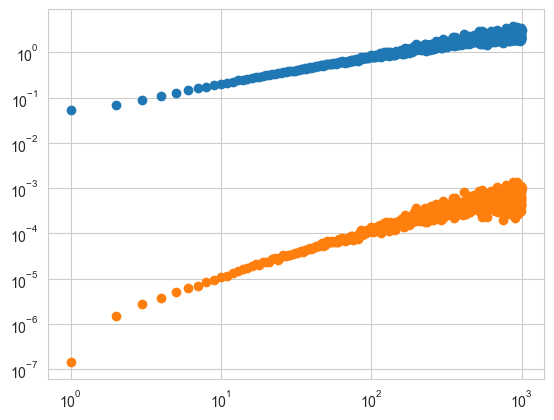

In [20]:
plt.scatter(range(1, MAX_LAG),RN)
plt.scatter(range(1, MAX_LAG),QN)
plt.loglog()

In [35]:
fit_result_dic = compute_fit_results(tsla_result_df, ALPHA, BETA)

In [37]:
fit_result_dic[5]

{'param': array([1.28035313e-01, 5.02759515e-06]),
 'x': array([-2.69767886e-05, -1.49247884e-05, -1.13402104e-05, -9.26195481e-06,
        -7.81042824e-06, -6.65242795e-06, -5.68444900e-06, -4.84069658e-06,
        -4.10435808e-06, -3.43020282e-06, -2.81260296e-06, -2.21126379e-06,
        -1.63449262e-06, -1.04803770e-06, -4.63824701e-07,  7.81906443e-08,
         6.50878132e-07,  1.25059580e-06,  1.83752940e-06,  2.43532398e-06,
         3.04984139e-06,  3.71686153e-06,  4.45152480e-06,  5.22866288e-06,
         6.12602158e-06,  7.14174349e-06,  8.35799141e-06,  9.92045388e-06,
         1.21033675e-05,  1.57687643e-05,  2.81778616e-05]),
 'y': array([-0.06768861, -0.06910597, -0.06941821, -0.06816695, -0.06349804,
        -0.06387724, -0.06268443, -0.05990346, -0.05599939, -0.05385827,
        -0.04680272, -0.04598774, -0.03335151, -0.02864274, -0.02095808,
        -0.00187013,  0.0109859 ,  0.02265178,  0.03456429,  0.03831051,
         0.05017287,  0.04979844,  0.05757492,  0.0601

### Fit power law functon on series of RN and QN